In [8]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RectBivariateSpline

In [9]:
def rebin_interp(img,new_size=[512,512]):
    #rebinea imagenes, por default a 512
    x1 = np.linspace(0, img.shape[0], img.shape[0])-img.shape[0]
    y1 = np.linspace(0, img.shape[1], img.shape[1])-img.shape[1]
    #fun = interp2d(x1, y1, img, kind='linear')
    spline = RectBivariateSpline(x1, y1, img)
    x = np.linspace(0, img.shape[0], new_size[0])-img.shape[0]
    y = np.linspace(0, img.shape[1], new_size[1])-img.shape[1]
    interpolated_image = spline(x, y)
    return interpolated_image

In [10]:
def find_closest_index(array, value):
    """Finds the index of the element in the array that is closest to the given value.
    """
    differences = np.abs(array - value)
    closest_index = np.argmin(differences)
    return closest_index

In [11]:
gif_files = []
directory = '/data1/work/tomography_hug_morgan/2019/'
file_path = directory + "list_2219_07_02.txt"
#file_path = directory + "list_awsom.txt"
with open(file_path, 'r') as file:
    # Read each line and strip newline characters
    gif_files = [directory+line.strip() for line in file]

#gif_files

In [12]:
matrix_list = []
heights = []

for gif_file in gif_files:
    sav_data = readsav(gif_file)
    heights.append(sav_data['rmain'])
    shift_long_index = np.abs(sav_data['lon_rad']).argmin()
    slice_copy = sav_data['dens'].copy() * 0.
    slice_copy[:,0:540-shift_long_index]=sav_data['dens'][:,shift_long_index:]
    slice_copy[:,540-shift_long_index:]=sav_data['dens'][:,0:shift_long_index]
    matrix_list.append(slice_copy)

nr = len(heights)
nlat = len(sav_data['colat_rad'])
nlon = len(sav_data['lon_rad'])
matrix_ne = np.zeros((nr,nlat,nlon))

for i in range(nr):
    matrix_ne[i,:,:] = matrix_list[i]

In [4]:
#TODO list:
#usar pa_rad, bobs y mod para crear las imagenes sinteticas. usar pyvista. pa_rad es polar angles CCW

dict_keys(['mission', 'instr', 'middate', 'lon_rad', 'colat_rad', 'rmain', 'dens', 'bobs', 'bmod', 'pa_rad', 'dates', 'credit', 'description', 'contact'])

In [6]:
np.degrees(sav_data['pa_rad'])

array([  0.        ,   0.49999997,   0.99999994,   1.5       ,
         1.9999999 ,   2.4999998 ,   3.        ,   3.4999998 ,
         3.9999998 ,   4.5       ,   4.9999995 ,   5.4999995 ,
         6.        ,   6.4999995 ,   6.9999995 ,   7.5       ,
         7.9999995 ,   8.499999  ,   9.        ,   9.499999  ,
         9.999999  ,  10.5       ,  10.999999  ,  11.499999  ,
        12.        ,  12.499999  ,  12.999999  ,  13.499999  ,
        13.999999  ,  14.499999  ,  15.        ,  15.499998  ,
        15.999999  ,  16.5       ,  16.999998  ,  17.499998  ,
        18.        ,  18.499998  ,  18.999998  ,  19.5       ,
        19.999998  ,  20.499998  ,  21.        ,  21.499998  ,
        21.999998  ,  22.5       ,  22.999998  ,  23.499998  ,
        24.        ,  24.499998  ,  24.999998  ,  25.499998  ,
        25.999998  ,  26.499998  ,  26.999998  ,  27.499998  ,
        27.999998  ,  28.499998  ,  28.999998  ,  29.499998  ,
        30.        ,  30.5       ,  30.999996  ,  31.49

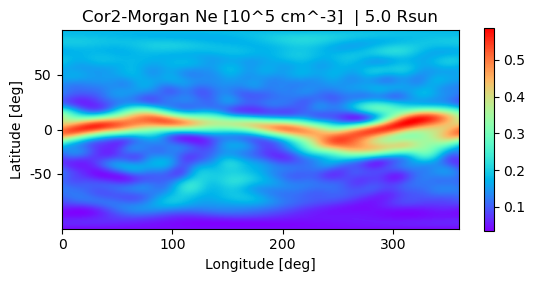

In [13]:
height = 5.0
index = find_closest_index(np.array(heights), height)
units = 1.e5
slice_to_plot = matrix_ne[index,:,:]/units
slice_to_plot = np.clip(slice_to_plot, 0, 1.6)
# Create a heatmap
plt.imshow(slice_to_plot, cmap='rainbow')#,origin='lower')  # Adjust cmap as needed
plt.yticks([60,135,195], ['50', '0', '-50'])
plt.xticks([0,150,300,450], ['0', '100', '200', '300'])
plt.title( f"{'Cor2-Morgan Ne [10^5 cm^-3]  | '}{np.round(heights[index])} Rsun")
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.colorbar(shrink=0.55)
plt.show()

In [91]:
aux = matrix_ne[index,:,:]
asd = rebin_interp(aux,new_size=[180,360])

In [93]:
def read_binary_file_tom(file_path, nr=60,nth=60,nph=120,dtype=np.float32):
    with open(file_path, "rb") as file:
        data = file.read()
    return np.frombuffer(data, dtype=dtype).reshape((nph,nth,nr))

In [94]:
ne_file = '/data1/work/leuven_2024/Daria_Tom/tomografias/x_LASCOC2pB_CR2219_24hr-Cadence_Rmin2.25_Rmax8.25_IRmin2.5_IRmax6.0_60x60x120_BF2_r3D_l2.5e-5_NorthUp_interpolado'
ne_matrix    = read_binary_file_tom(ne_file, nr=60,nth=90,nph=180)
#para un ploteo adecuado, las matrices binarias deben ser transpuestas
ne_matrixT = np.transpose(ne_matrix, (2, 1, 0))

In [95]:
rmin = 2.25
rmax = 8.25
nr = 60
nth = 90
nph = 180

dr = (rmax-rmin)/nr 
dt = 180./nth       
dp = 360./nph        

rad = rmin  + dr/2. + dr * np.arange(nr+1)
lat = -90.  + dt/2. + dt * np.arange(nth+1)
y_polar = 90 - lat +1 
lon =   0.  +  dp/2.+ dp *  np.arange(nph+1)

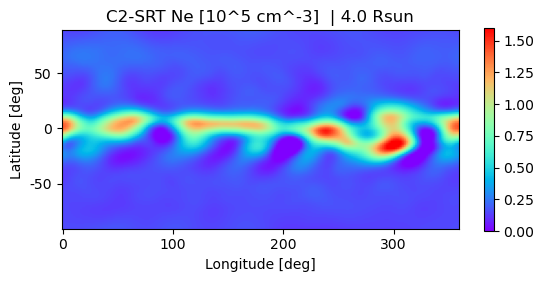

In [113]:
height = 4.
index = find_closest_index(rad, height)
units = 1.e5
slice_to_plot = ne_matrixT[index, :, :]  /units 
slice_to_plot = np.clip(slice_to_plot, 0, 1.6)
# Create a heatmap
plt.imshow(slice_to_plot, cmap='rainbow',origin='lower')  # Adjust cmap as needed
plt.yticks([20,45,70], ['-50', '0', '50'])
plt.xticks([0,50,100,150], ['0', '100', '200', '300'])
plt.title( f"{'C2-SRT Ne [10^5 cm^-3]  | '}{rad[index]} Rsun")
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.colorbar(shrink=0.55)
plt.show()

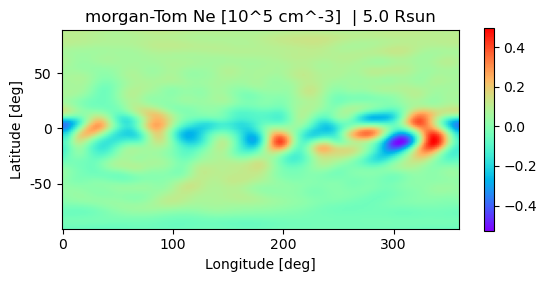

In [118]:
height = 5.0
index1 = find_closest_index(np.array(heights), height)
units = 1.e5
#slice_to_plot1 = matrix_ne[index1,:,:]/units
aux = matrix_ne[index1,:,:]
asd = rebin_interp(aux,new_size=[90,180])
slice_to_plot1 = asd[::-1] / units

index2 = find_closest_index(rad, height)
slice_to_plot2 = ne_matrixT[index2, :, :]  /units 
diff = slice_to_plot1 - slice_to_plot2

plt.imshow(diff, cmap='rainbow',origin='lower')  # Adjust cmap as needed
plt.yticks([20,45,70], ['-50', '0', '50'])
plt.xticks([0,50,100,150], ['0', '100', '200', '300'])
plt.title( f"{'morgan-Tom Ne [10^5 cm^-3]  | '}{height} Rsun")
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.colorbar(shrink=0.55)
plt.show()